In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Link to the dataset - https://www.kaggle.com/emrearslan123/eda-top-10000-movies-dataset/data

In [2]:
df = pd.read_csv('/Users/anike/ML/Datasets/Top_10000_Movies.csv', engine='python')
df.shape

(10014, 13)

In [3]:
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [5]:
# Removed the unnamed column which was not useful.

df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [6]:
df.columns

Index(['original_language', 'original_title', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'genre', 'overview', 'revenue', 'runtime',
       'tagline'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  10002 non-null  object 
 1   original_title     10001 non-null  object 
 2   popularity         10000 non-null  float64
 3   release_date       9962 non-null   object 
 4   vote_average       10000 non-null  float64
 5   vote_count         10000 non-null  float64
 6   genre              10000 non-null  object 
 7   overview           9900 non-null   object 
 8   revenue            9998 non-null   float64
 9   runtime            9989 non-null   float64
 10  tagline            7079 non-null   object 
dtypes: float64(5), object(6)
memory usage: 860.7+ KB


#### Converted dtype of release_date from object to `pd.datetime`

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'], format="%Y-%m-%d")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10013
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  10002 non-null  object        
 1   original_title     10001 non-null  object        
 2   popularity         10000 non-null  float64       
 3   release_date       9962 non-null   datetime64[ns]
 4   vote_average       10000 non-null  float64       
 5   vote_count         10000 non-null  float64       
 6   genre              10000 non-null  object        
 7   overview           9900 non-null   object        
 8   revenue            9998 non-null   float64       
 9   runtime            9989 non-null   float64       
 10  tagline            7079 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 937.8+ KB


#### Checking for null values if any

In [12]:
df.isna().values.any()

True

In [11]:
df.isnull().sum()

original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

#### So this dataset contains Nan values in each attribute and the tagline has around 3k Nan values, now let's check for duplicate records.

In [13]:
df.duplicated().sum()

11

In [14]:
df.drop_duplicates(inplace=True)

### We'll try asking some questions and write query accordingly so we can get insights from the dataset.

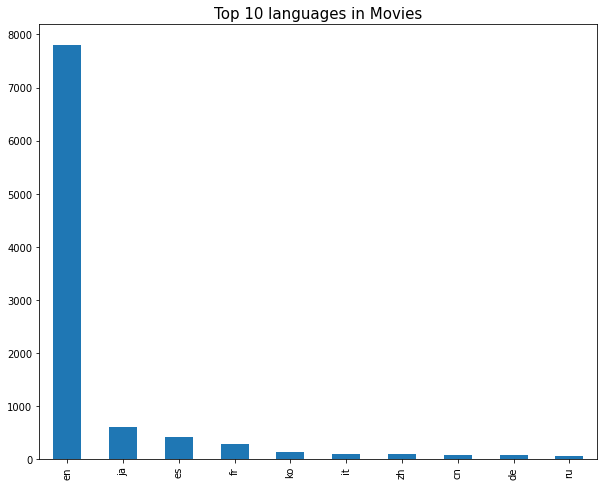

In [54]:
## In which language most of the movies are ?

plt.figure(figsize=(10, 8))
df['original_language'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 languages in Movies', size=15)
plt.show()

Around 8000 movies in this dataset are in English.

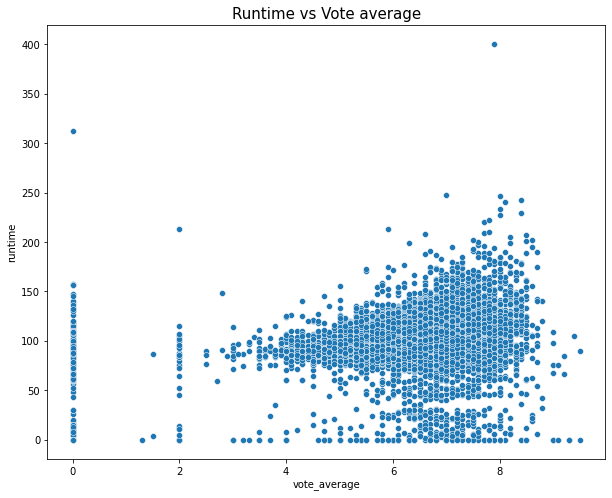

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['vote_average'], y=df['runtime'])
plt.title('Runtime vs Vote average', size=15)
plt.show()

This shows that the majority of the movies have an `average_vote` between 6 and 8 with `runtime` between 100 to 200 minutes.

#### We'll convert revenue into millions for easy understanding.

In [40]:
df['revenue'] = df['revenue'] / 1000000
df['revenue'] = df['revenue'].round(1)

In [45]:
# Now let's see movies with highest revenues.

top10_movies_by_revenue = df.iloc[df['revenue'].sort_values(ascending=False).head(10).index]
top10_movies_by_revenue

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
66,en,Avatar,374.059,2009-12-10,7.5,24280.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","In the 22nd century, a paraplegic Marine is di...",2847.2,162.0,Enter the World of Pandora.
167,en,Avengers: Endgame,193.860,2019-04-24,8.3,19434.0,"['Adventure', 'Science Fiction', 'Action']",After the devastating events of Avengers: Infi...,2797.8,181.0,Part of the journey is the end.
489,en,Titanic,94.235,1997-11-18,7.9,19999.0,"['Drama', 'Romance']",101-year-old Rose DeWitt Bukater tells the sto...,2187.5,194.0,Nothing on Earth could come between them.
1013,en,Star Wars: The Force Awakens,59.007,2015-12-15,7.3,16314.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",Thirty years after defeating the Galactic Empi...,2068.2,136.0,Every generation has a story.
97,en,Avengers: Infinity War,307.188,2018-04-25,8.3,23027.0,"['Adventure', 'Action', 'Science Fiction']",As the Avengers and their allies have continue...,2046.2,149.0,An entire universe. Once and for all.
653,en,Jurassic World,79.276,2015-06-06,6.7,17336.0,"['Action', 'Adventure', 'Science Fiction', 'Th...",Twenty-two years after the events of Jurassic ...,1671.7,124.0,The park is open.
545,en,The Lion King,103.805,2019-07-12,7.2,8021.0,"['Adventure', 'Family', 'Animation']","Simba idolizes his father, King Mufasa, and ta...",1667.6,118.0,The King has Returned.
173,en,The Avengers,209.584,2012-04-25,7.7,25642.0,"['Science Fiction', 'Action', 'Adventure']",When an unexpected enemy emerges and threatens...,1518.8,143.0,Some assembly required.
590,en,Furious 7,93.407,2015-04-01,7.3,8750.0,"['Action', 'Thriller', 'Crime', 'Adventure']",Deckard Shaw seeks revenge against Dominic Tor...,1515.0,137.0,Vengeance Hits Home
230,en,Frozen II,166.097,2019-11-20,7.3,7740.0,"['Family', 'Animation', 'Adventure', 'Comedy',...","Elsa, Anna, Kristoff and Olaf head far into th...",1450.0,103.0,The past is not what it seems.


In [46]:
top10_movies_by_revenue[['original_title', 'revenue']]

,original_title,revenue
66,Avatar,2847.2
167,Avengers: Endgame,2797.8
489,Titanic,2187.5
1013,Star Wars: The Force Awakens,2068.2
97,Avengers: Infinity War,2046.2
653,Jurassic World,1671.7
545,The Lion King,1667.6
173,The Avengers,1518.8
590,Furious 7,1515.0
230,Frozen II,1450.0


So the top movies are making revenue in billions of dollars.<br>
Avatar movie tops the revenue chart with \\$2.8 bn and also out of the top 10, 3 are Avenger movies with a combined revenue of \\$6.3 bn, seems like there are lot of Marvel fans out there.

In [52]:
df.iloc[[167, 97, 173]]['revenue'].sum()

6362.8

c:\users\anike\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


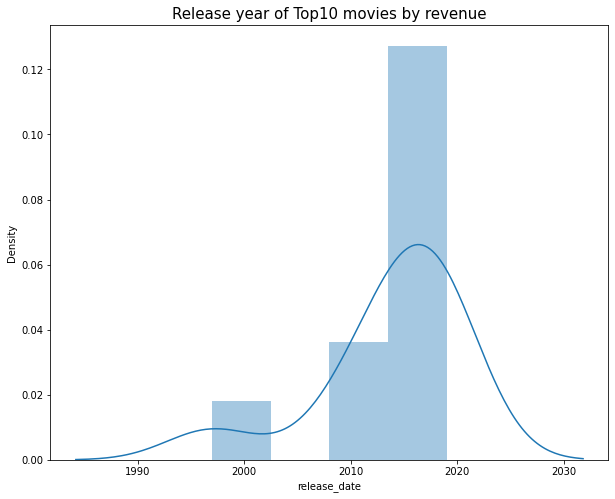

In [80]:
plt.figure(figsize=(10, 8))
sns.distplot(top10_movies_by_revenue['release_date'].dt.year)
plt.title('Release year of Top10 movies by revenue', size=15)
plt.show()

Only one movie **Titanic** before **2000** is in the top10 list, and other 9 movies were released between **2010** & **2020**, it might be due to advancement in technologies used in these movies.

In [72]:
df['vote_average'] = pd.to_numeric(df['vote_average'])
df['revenue'] = pd.to_numeric(df['revenue'])

In [77]:
# Now let's see top 10 movies by average_vote

df2 = df[df['vote_average']>8.0]
df2 = df2[df2['revenue'] > 0]
df2 = df2[df2['vote_count'] > 1000]

df2.sort_values(by='vote_average', ascending=False).head(10)

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
3326,hi,दिलवाले दुल्हनिया ले जायेंगे,24.654,1995-10-20,8.7,3213.0,"['Comedy', 'Drama', 'Romance']","Raj is a rich, carefree, happy-go-lucky second...",100.0,190.0,"Come Fall In love, All Over Again.."
1103,en,The Godfather,54.022,1972-03-14,8.7,15020.0,"['Drama', 'Crime']","Spanning the years 1945 to 1955, a chronicle o...",245.1,175.0,An offer you can't refuse.
1023,en,The Shawshank Redemption,65.490,1994-09-23,8.7,20048.0,"['Drama', 'Crime']",Framed in the 1940s for the double murder of h...,28.3,142.0,Fear can hold you prisoner. Hope can set you f...
234,ja,君の名は。,154.252,2016-08-26,8.6,8013.0,"['Romance', 'Animation', 'Drama']",High schoolers Mitsuha and Taki are complete s...,358.0,106.0,NaN
2069,en,Schindler's List,34.532,1993-11-30,8.6,11994.0,"['Drama', 'History', 'War']",The true story of how businessman Oskar Schind...,321.4,195.0,"Whoever saves one life, saves the world entire."
1812,en,The Godfather: Part II,44.959,1974-12-20,8.6,9028.0,"['Drama', 'Crime']",In the continuing saga of the Corleone crime f...,102.6,202.0,"I don't feel I have to wipe everybody out, Tom..."
533,en,The Lord of the Rings: The Return of the King,93.118,2003-12-01,8.5,18523.0,"['Adventure', 'Fantasy', 'Action']",Aragorn is revealed as the heir to the ancient...,1118.9,201.0,The eye of the enemy is moving.
1494,en,GoodFellas,37.400,1990-09-12,8.5,9475.0,"['Drama', 'Crime']","The true story of Henry Hill, a half-Irish, ha...",46.8,145.0,Three Decades of Life in the Mafia.
563,ko,기생충,96.306,2019-05-30,8.5,12445.0,"['Comedy', 'Thriller', 'Drama']","All unemployed, Ki-taek's family takes peculia...",257.6,133.0,Act like you own the place.
1422,en,Forrest Gump,48.079,1994-07-06,8.5,21522.0,"['Comedy', 'Drama', 'Romance']",A man with a low IQ has accomplished great thi...,677.4,142.0,Life is like a box of chocolates...you never k...


The above query shows top movies by vote_average where more than 1000 people have voted and revenue not equal to zero.<br>
Also the movie database is not up to date, so some of the top-rated latest movies might not be here.

In [78]:
df.corr()

,popularity,vote_average,vote_count,revenue,runtime
popularity,1.000000,0.053540,0.127125,0.156016,0.028713
vote_average,0.053540,1.000000,0.246775,0.144922,0.389529
vote_count,0.127125,0.246775,1.000000,0.771695,0.298711
revenue,0.156016,0.144922,0.771695,1.000000,0.259221
runtime,0.028713,0.389529,0.298711,0.259221,1.000000


<AxesSubplot:>

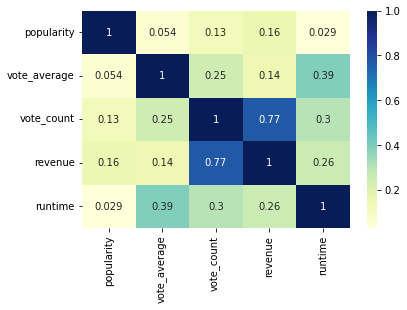

In [79]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

The above heatmap of correlation matrix shows there aren't many correlations between attributes, there is a slight positve correlation between `runtime` and `average_vote`.